# Kinematic analysis of a six-bar gripper mechanism

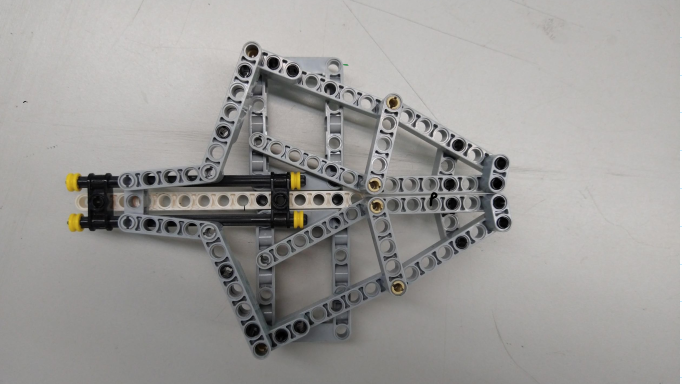

## Kinematic diagram and vector diagram

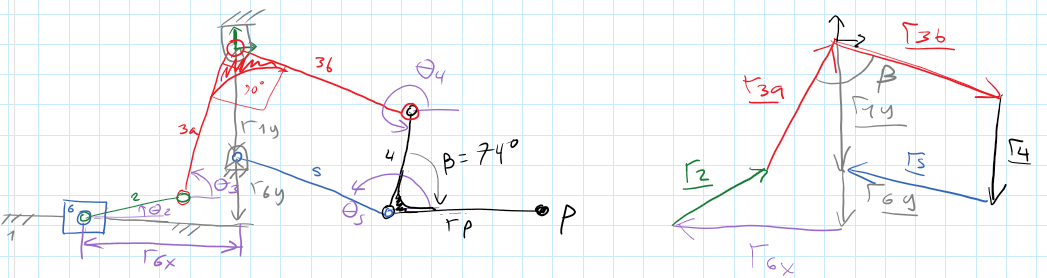

## Variables and parameters

Main variable: $r_{6x}$

Secondary variables: $\theta_2,\theta_3,\theta_4,\theta_5$

Parameters: $r_2,r_{3a},r_{3b},r_{4},r_{5},r_{1y},r_{6y},\alpha$

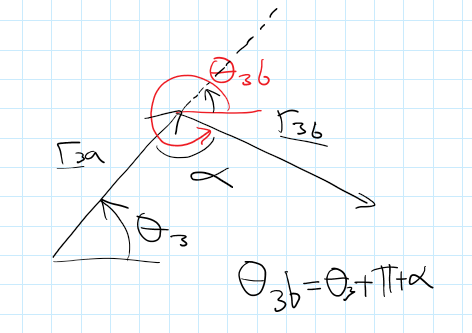

$\theta_{3b} = \theta_3 + \pi + \alpha$

## Vector equations

$-\overrightarrow{r_{3a}} - \overrightarrow{r_{2}} - \overrightarrow{r_{6x}} - \overrightarrow{r_{6y}} - \overrightarrow{r_{1y}} = 0$ (1)

$\overrightarrow{r_{3b}} + \overrightarrow{r_{4}} + \overrightarrow{r_{5}} - \overrightarrow{r_{1y}} = 0$ (2)

## Scalar equations

...

## Numerical methods implementation

### import modules

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Function definition

In [4]:
def gripper(initCond,params):
    # main variable
    r6x = params[0]
    # parameters
    r2 = params[1]
    r3a = params[2]
    r3b = params[3]
    r4 = params[4]
    r5 = params[5]
    r1y = params[6]
    r6y = params[7]
    alpha = params[8]
    
    # initial conditions
    th2 = initCond[0]
    th3 = initCond[1]
    th4 = initCond[2]
    th5 = initCond[3]
    
    #Y = [0.0,0.0,0.0,0.0] 
    Y = np.zeros(4)
    Y[0] = -r3a*np.cos(th3) - r2*np.cos(th2) - r6x*np.cos(np.pi) - r6y*np.cos(3*np.pi/2) - r1y*np.cos(3*np.pi/2)
    Y[1] = -r3a*np.sin(th3) - r2*np.sin(th2) - r6x*np.sin(np.pi) - r6y*np.sin(3*np.pi/2) - r1y*np.sin(3*np.pi/2)
    Y[2] = r3b*np.cos(th3+np.pi+alpha) + r4*np.cos(th4) + r5*np.cos(th5) - r1y*np.cos(3*np.pi/2)
    Y[3] = r3b*np.sin(th3+np.pi+alpha) + r4*np.sin(th4) + r5*np.sin(th5) - r1y*np.sin(3*np.pi/2)   
    return Y

### Function  test

In [7]:
r2 = 4
r3a = 6
r3b = 7
r4 = 4
r5 = 6
r1y = 4
r6y = 2
alpha = np.pi/2

r6x = 6

parameters = [r6x,r2,r3a,r3b,r4,r5,r1y,r6y,alpha]

th2Ini = np.deg2rad(6)
th3Ini = np.deg2rad(71)
th4Ini = np.deg2rad(255)
th5Ini = np.deg2rad(154)

x0 = [th2Ini,th3Ini,th4Ini,th5Ini]

print(gripper(x0,parameters))

[ 0.06850349 -0.09122531  0.19058957  0.48754649]


### Solve for initial conditions

In [8]:
q,info,exitflag,mensaje = fsolve(gripper,x0,args = parameters,full_output = True)
print("solucion = ",np.rad2deg(q),"\n",exitflag,"\n",mensaje)

solucion =  [  4.99892174  70.37460339 255.24368938 158.29306473] 
 1 
 The solution converged.
